### Predictive Analytics

Dataset : Insurance ( Kaggle )

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [2]:
data = pd.read_csv('../Data/Insurance.csv')
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


Handling **Missing** Values

In [3]:
data.isna().sum()

age         0
sex         0
bmi         5
children    0
smoker      0
region      0
charges     0
dtype: int64

In [4]:
missing = data.isna().sum()
missing[missing > 0]

bmi    5
dtype: int64

Fill the Missing Value with the **Mean**

In [5]:
data['bmi'].fillna(data['bmi'].mean(), inplace=True)
data.isna().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

### Data Understanding

Visualization

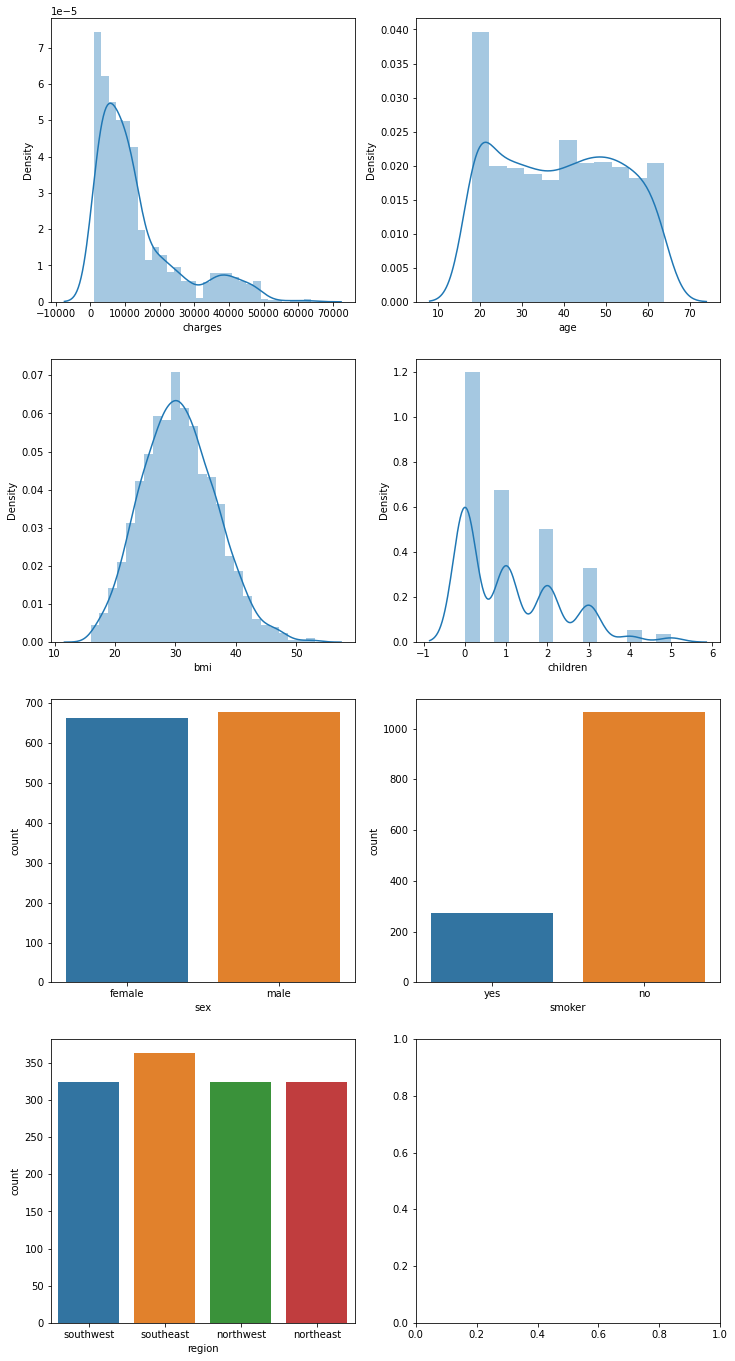

In [6]:
figure, ax = plt.subplots(nrows=4, ncols=2, figsize=(12,24))

# Distribution of Data `
sns.distplot(data['charges'], ax = ax[0,0])
sns.distplot(data['age'], ax = ax[0,1])
sns.distplot(data['bmi'], ax = ax[1,0])
sns.distplot(data['children'], ax = ax[1,1])

sns.countplot(data['sex'], ax = ax[2,0])
sns.countplot(data['smoker'], ax = ax[2,1])
sns.countplot(data['region'], ax = ax[3,0]);

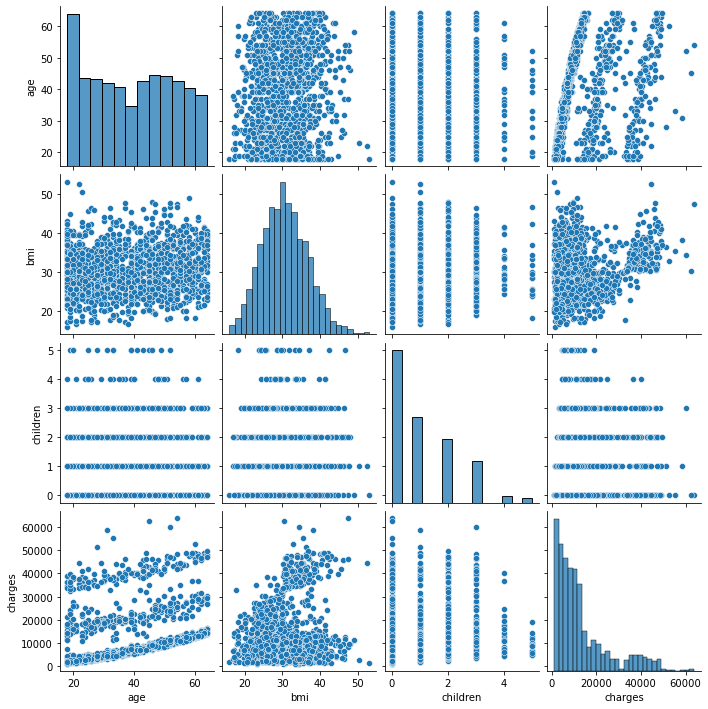

In [7]:
sns.pairplot(data);

Age vs Charges based on Smoker

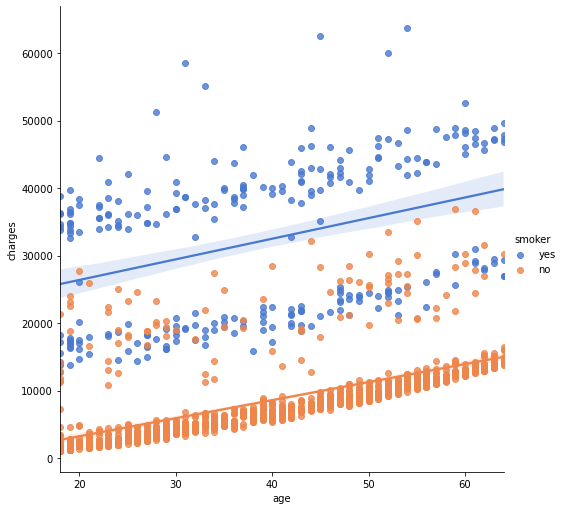

In [8]:
sns.lmplot(x='age', y='charges', hue='smoker', data=data, palette='muted', height=7);

Hearmap (Correlation)

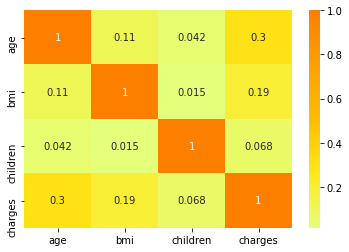

In [9]:
sns.heatmap(data.corr(), cmap='Wistia', annot=True);

### Data Preparation

Handling Categorical Variables

1. Label Encoding : Ordinal

2. One Hot Encoding : Nominal

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [11]:
data['sex'].value_counts()

male      676
female    662
Name: sex, dtype: int64

In [12]:
data['region'].value_counts()

southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64

In [13]:
data['smoker'].value_counts()

no     1064
yes     274
Name: smoker, dtype: int64

In [14]:
data['sex'].head()

0    female
1      male
2      male
3      male
4      male
Name: sex, dtype: object

Creating ndarray for Label Encoding

In [15]:
le = LabelEncoder()
sex = le.fit_transform(data['sex'])
sex

array([0, 1, 1, ..., 0, 0, 0])

In [16]:
sex = pd.DataFrame(sex)
sex.columns = ['sex']
sex.head()

,sex
0,0
1,1
2,1
3,1
4,1


In [17]:
print(f'Class Labels : {le.classes_}')

Class Labels : ['female' 'male']


In [18]:
print(f'Transformed Class Labels : {le.transform(le.classes_)}')

Transformed Class Labels : [0 1]


In [19]:
print(f'Class Label Mapping : {dict(zip(le.classes_, le.transform(le.classes_)))}')

Class Label Mapping : {'female': 0, 'male': 1}


In [20]:
le = LabelEncoder()
smoker = le.fit_transform(data['smoker'])
smoker[:5]

array([1, 0, 0, 0, 0])

In [21]:
smoker = pd.DataFrame(smoker)
smoker.columns = ['smoker']
smoker.head()

,smoker
0,1
1,0
2,0
3,0
4,0


In [22]:
print(f'Class Labels : {le.classes_}')

Class Labels : ['no' 'yes']


In [23]:
print(f'Transformed Class Labels : {le.transform(le.classes_)}')

Transformed Class Labels : [0 1]


In [24]:
print(f'Class Label Mapping : {dict(zip(le.classes_, le.transform(le.classes_)))}')

Class Label Mapping : {'no': 0, 'yes': 1}


One Hot Encoding

In [25]:
ohe = OneHotEncoder()
region = ohe.fit_transform(data[['region']]).toarray()
region[:5]

array([[0., 0., 0., 1.],
       [0., 0., 1., 0.],
       [0., 0., 1., 0.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.]])

In [26]:
region = pd.DataFrame(region)
region.head()

,0,1,2,3
0,0.0,0.0,0.0,1.0
1,0.0,0.0,1.0,0.0
2,0.0,0.0,1.0,0.0
3,0.0,1.0,0.0,0.0
4,0.0,1.0,0.0,0.0


In [27]:
print(f'Labels : {ohe.categories_}')

Labels : [array(['northeast', 'northwest', 'southeast', 'southwest'], dtype=object)]


In [28]:
region.columns = ['northeast', 'northwest', 'southeast', 'southwest']
region.head(10)

,northeast,northwest,southeast,southwest
0,0.0,0.0,0.0,1.0
1,0.0,0.0,1.0,0.0
2,0.0,0.0,1.0,0.0
3,0.0,1.0,0.0,0.0
4,0.0,1.0,0.0,0.0
5,0.0,0.0,1.0,0.0
6,0.0,0.0,1.0,0.0
7,0.0,1.0,0.0,0.0
8,1.0,0.0,0.0,0.0
9,0.0,1.0,0.0,0.0


In [29]:
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [30]:
numeric = data[['age','bmi','children']]
numeric.head()

,age,bmi,children
0,19,27.900,0
1,18,33.770,1
2,28,33.000,3
3,33,22.705,0
4,32,28.880,0


Concatenate the Numeric and **Encoded** Categorical Data 

In [31]:
X = pd.concat([numeric, sex, smoker, region], axis=1)
X.head()

,age,bmi,children,sex,smoker,northeast,northwest,southeast,southwest
0,19,27.900,0,0,1,0.0,0.0,0.0,1.0
1,18,33.770,1,1,0,0.0,0.0,1.0,0.0
2,28,33.000,3,1,0,0.0,0.0,1.0,0.0
3,33,22.705,0,1,0,0.0,1.0,0.0,0.0
4,32,28.880,0,1,0,0.0,1.0,0.0,0.0


In [32]:
y = data[['charges']].copy()
y.head()

,charges
0,16884.92400
1,1725.55230
2,4449.46200
3,21984.47061
4,3866.85520


Splitting the Data into Train Set and Test Set

In [33]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=0)

### Feature Scaling

**MinMaxScaler** : Range between 0 and 1

**StandardScaler** : Range between -n and n ( mean = 0 and std = 1 )

**fit_transform(X_train)** : Fit ( Train ) Data so that we Learn the Parameters of Scaling on Train Data + Scale the Train Data

**transform(X_test)** : The Scaling Parameters learned on the Train Data to Scale the Test Data.

**Benefits** : Reduce the Effect of Features with **Large Scale** which Plays a Dominating Role and **Outliers**

In [34]:
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train.astype(np.float))
X_test = scaler.transform(X_test.astype(np.float))

In [35]:
X_train[0]

array([0.15217391, 0.49838579, 0.        , 0.        , 0.        ,
       0.        , 1.        , 0.        , 0.        ])

In [36]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=0)

In [37]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train.astype(np.float))
X_test = scaler.transform(X_test.astype(np.float))

In [38]:
X_train[0]

array([-1.03606235,  0.61468414, -0.91008919, -0.98669564, -0.4996512 ,
       -0.54811989,  1.77430216, -0.61002347, -0.58766091])

In [39]:
print(X_train.mean())
print(X_train.std())

-2.4671622769447922e-17
1.0


### Data Modeling

### 1. Linear Regression

In [40]:
lr = LinearRegression()
model = lr.fit(X_train, y_train)
train_pred = model.predict(X_train)
text_pred = model.predict(X_test)

In [41]:
print(f'Slope : \n{model.coef_}\n')
print(f'Intercept : {model.intercept_}\n')
print(f'Train Score : {model.score(X_train, y_train)*100:.2f}% and Test Score : {model.score(X_test, y_test)*100:.2f}% using Linear Regression.')

Slope : 
[[ 3.71358750e+03  1.85247756e+03  4.80554287e+02 -7.65500099e+01
   9.21480869e+03  8.67904582e+17  8.80761920e+17  9.15454839e+17
   8.99452493e+17]]

Intercept : [13175.06673693]

Train Score : 72.73% and Test Score : 78.37% using Linear Regression


### 2. Polynomial Linear Regression

In [42]:
poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_poly, y, test_size=0.33, random_state=0)
X_train[0]

array([1.00000000e+00, 2.50000000e+01, 3.44850000e+01, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 1.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 6.25000000e+02, 8.62125000e+02,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       2.50000000e+01, 0.00000000e+00, 0.00000000e+00, 1.18921522e+03,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       3.44850000e+01, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 1.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00])

In [43]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train.astype(np.float))
X_test = scaler.transform(X_test.astype(np.float))
X_train[0]

array([ 0.        , -1.03606235,  0.61468414, -0.91008919, -0.98669564,
       -0.4996512 , -0.54811989,  1.77430216, -0.61002347, -0.58766091,
       -1.00782582, -0.68904545, -0.85018583, -0.88107894, -0.46421754,
       -0.50755758,  0.82614738, -0.56232132, -0.54333881,  0.53005988,
       -0.88174279, -0.94849377, -0.48700346, -0.53386564,  2.15977211,
       -0.59527082, -0.57357794, -0.61300381, -0.53860116, -0.32910548,
       -0.3334737 , -0.35857559, -0.37458217, -0.36469486, -0.98669564,
       -0.35643236, -0.36433963, -0.36237154, -0.40077645, -0.37215673,
       -0.4996512 , -0.22725139, -0.21332507, -0.27028484, -0.20161946,
       -0.54811989,  0.        ,  0.        ,  0.        ,  1.77430216,
        0.        ,  0.        , -0.61002347,  0.        , -0.58766091])

In [44]:
poly_lr = LinearRegression()
model = poly_lr.fit(X_train, y_train)
train_pred = model.predict(X_train)
test_pred = model.predict(X_test)

In [45]:
print(f'Slope : \n{model.coef_}\n')
print(f'Intercept : \n{model.intercept_}\n')
print(f'Train Score : {model.score(X_train, y_train)*100:.2f}% and Test Score {model.score(X_test, y_test)*100:.2f}% using Polynomial Linear Regression.')

Slope : 
[[ 5.96081652e-14  7.21122662e+11 -4.97619302e+12  1.06328340e+13
  -1.59016976e+12  4.79420526e+12 -2.17973224e+13 -1.92633855e+13
  -2.13635439e+13 -2.15318609e+13  3.63127840e+03 -4.59549183e+02
   2.27310078e+02  2.74895014e+02  1.48388577e+02 -9.32950670e+11
  -9.54060040e+11 -9.73217995e+11 -9.46987077e+11 -2.21381152e+03
   3.57974903e+02  4.96822263e+02  1.80215976e+04  1.02124283e+13
   1.02696056e+13  1.23386925e+13  1.10260388e+13 -2.97928154e+02
  -3.73787597e+02 -2.70292040e+02 -6.45508280e+12 -6.47133765e+12
  -6.64294033e+12 -7.44577589e+12 -4.43199929e+12 -1.21070801e+02
   3.87433146e+12  3.85827467e+12  4.15942573e+12  3.93744496e+12
   1.01581960e+13 -8.08110936e+12 -7.63040453e+12 -9.41961177e+12
  -7.24536796e+12 -1.51459726e+13  0.00000000e+00  0.00000000e+00
   0.00000000e+00 -1.82271960e+13  0.00000000e+00  0.00000000e+00
  -1.76037791e+13  0.00000000e+00 -1.67543050e+13]]

Intercept : 
[13141.3489143]

Train Score : 82.77% and Test Score 87.01% using P

### 3. Support Vector Regression

In [46]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=0)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train.astype(np.float))
X_test = scaler.transform(X_test.astype(np.float))
X_train[0]

array([-1.03606235,  0.61468414, -0.91008919, -0.98669564, -0.4996512 ,
       -0.54811989,  1.77430216, -0.61002347, -0.58766091])

In [47]:
svr = SVR(kernel='linear', C=300)
model = svr.fit(X_train, y_train.values.ravel())
train_pred = model.predict(X_train)
test_pred = model.predict(X_test)

In [48]:
print(f'Slopes : \n{model.coef_}\n')
print(f'Intercept : \n{model.intercept_}\n')
print(f'Train Score : {model.score(X_train, y_train)*100:.2f}% and Test Score : {model.score(X_test, y_test)*100:.2f}% using Support Vector Regressor.')

Slopes : 
[[3652.88084977  202.46754224  475.97904631 -184.83769075 6571.51888242
   179.67244105   32.53987879 -126.02330398  -76.96879816]]

Intercept : 
[10370.82641928]

Train Score : 59.79% and Test Score : 62.80% using Support Vector Regressor


### 4. Decision Tree Regression

In [49]:
dtr = DecisionTreeRegressor(random_state=0)
model = dtr.fit(X_train, y_train)
train_pred = model.predict(X_train)
test_pred = model.predict(X_test)

In [50]:
print(f'Train Score : {model.score(X_train, y_train)*100:.2f}% and Test Score : {model.score(X_test, y_test)*100:.2f}% using Decision Tree Regressor.')

Train Score : 99.94% and Test Score : 71.68% using Decision Tree Regressor


This Model is Prone to Overfitting : High Accuracy on Train Data and Low Accuracy at Test Data

### 5. Random Forest Regression

In [51]:
rfr = RandomForestRegressor(n_estimators=100, criterion='mse', random_state=0, n_jobs=-1)
model = rfr.fit(X_train, y_train.values.ravel())
train_pred = model.predict(X_train)
test_pred = model.predict(X_test)

In [52]:
print(f'Train Score : {model.score(X_train, y_train)*100:.2f} and Test Score : {model.score(X_test, y_test)*100:.2f}% using Random Forest Regressor.')

Train Score : 97.40 and Test Score : 85.92% using Random Forest Regressor


Random Forest Regression gave the Best Accuracy as Compared to other Models.

### Model Success

1. We used R<sup>2</sup> for Measuring the Success of Models

2. We should Visualize 

3. Work with Domain Knowledge

### Strength and Weakness

1. Linear Regression : When we have Linear Relationship between Variables.

2. Polynomial Linear Regression : When we don't have Linear Relationship between the Variables. ( Degree is Important )

3. Support Vector Regressor : Kernel Trick works Better for Non Linear Data.

4. Decision Tree Regressor : No Need of Scaling and No Effect of Outlier either, Prone to Overfiting.

5. Random Forest Regressor : No Need of Scaling and Resilense to Outlier, Solve Overfitting too.

Data Modeling and Data Evaluation is Iteractive and Cyclic Process.

### Hyperparameter Optimization

- Finding Ideal Set of Parameters for a Prediction Algorithm with Optimum Performance

How to Identify Ideal Parameters ?

### Grid Search

1. Make a Grid of Search Space
2. Evaluate Each Hyperparameter Selected
3. Repeat in as many Dimension as Possible ( Iterative Process )

### Data Evaluation

Trying to Improve SVR using Grid Search Cross Validation and Hyperparameter Tuning.

In [53]:
parameter_grid_svr = {
    'kernel' : ['linear','poly'],
    'degree' : [2],
    'C' : [600,700,800,900], # Penalty of Error
    'epsilon' : [0.0001, 0.00001, 0.000001] # Margin of Tolerence
}

gscv = GridSearchCV(SVR(), 
                   param_grid = parameter_grid_svr, 
                   cv = 5, # Cross Validation
                   verbose=3)

model = gscv.fit(X_train, y_train.values.ravel())

Fitting 5 folds for each of 24 candidates, totalling 120 fits
[CV] C=600, degree=2, epsilon=0.0001, kernel=linear ..................
[CV]  C=600, degree=2, epsilon=0.0001, kernel=linear, score=0.671, total=   0.0s
[CV] C=600, degree=2, epsilon=0.0001, kernel=linear ..................
[CV]  C=600, degree=2, epsilon=0.0001, kernel=linear, score=0.663, total=   0.0s
[CV] C=600, degree=2, epsilon=0.0001, kernel=linear ..................
[CV]  C=600, degree=2, epsilon=0.0001, kernel=linear, score=0.571, total=   0.0s
[CV] C=600, degree=2, epsilon=0.0001, kernel=linear ..................
[CV]  C=600, degree=2, epsilon=0.0001, kernel=linear, score=0.636, total=   0.0s
[CV] C=600, degree=2, epsilon=0.0001, kernel=linear ..................
[CV]  C=600, degree=2, epsilon=0.0001, kernel=linear, score=0.555, total=   0.0s
[CV] C=600, degree=2, epsilon=0.0001, kernel=poly ....................
[CV]  C=600, degree=2, epsilon=0.0001, kernel=poly, score=0.485, total=   0.0s
[CV] C=600, degree=2, epsilo

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s



[CV] C=600, degree=2, epsilon=0.0001, kernel=poly ....................
[CV]  C=600, degree=2, epsilon=0.0001, kernel=poly, score=0.278, total=   0.0s
[CV] C=600, degree=2, epsilon=0.0001, kernel=poly ....................
[CV]  C=600, degree=2, epsilon=0.0001, kernel=poly, score=0.372, total=   0.0s
[CV] C=600, degree=2, epsilon=0.0001, kernel=poly ....................
[CV]  C=600, degree=2, epsilon=0.0001, kernel=poly, score=0.222, total=   0.0s
[CV] C=600, degree=2, epsilon=1e-05, kernel=linear ...................
[CV]  C=600, degree=2, epsilon=1e-05, kernel=linear, score=0.671, total=   0.0s
[CV] C=600, degree=2, epsilon=1e-05, kernel=linear ...................
[CV]  C=600, degree=2, epsilon=1e-05, kernel=linear, score=0.663, total=   0.0s
[CV] C=600, degree=2, epsilon=1e-05, kernel=linear ...................
[CV]  C=600, degree=2, epsilon=1e-05, kernel=linear, score=0.571, total=   0.0s
[CV] C=600, degree=2, epsilon=1e-05, kernel=linear ...................
[CV]  C=600, degree=2, ep

[CV]  C=800, degree=2, epsilon=0.0001, kernel=poly, score=0.345, total=   0.0s
[CV] C=800, degree=2, epsilon=0.0001, kernel=poly ....................
[CV]  C=800, degree=2, epsilon=0.0001, kernel=poly, score=0.442, total=   0.0s
[CV] C=800, degree=2, epsilon=0.0001, kernel=poly ....................
[CV]  C=800, degree=2, epsilon=0.0001, kernel=poly, score=0.268, total=   0.0s
[CV] C=800, degree=2, epsilon=1e-05, kernel=linear ...................
[CV]  C=800, degree=2, epsilon=1e-05, kernel=linear, score=0.686, total=   0.0s
[CV] C=800, degree=2, epsilon=1e-05, kernel=linear ...................
[CV]  C=800, degree=2, epsilon=1e-05, kernel=linear, score=0.621, total=   0.0s
[CV] C=800, degree=2, epsilon=1e-05, kernel=linear ...................
[CV]  C=800, degree=2, epsilon=1e-05, kernel=linear, score=0.572, total=   0.0s
[CV] C=800, degree=2, epsilon=1e-05, kernel=linear ...................
[CV]  C=800, degree=2, epsilon=1e-05, kernel=linear, score=0.588, total=   0.0s
[CV] C=800, degre

[Parallel(n_jobs=1)]: Done 120 out of 120 | elapsed:    2.4s finished


In [54]:
print(f'Best Estimator : {model.best_estimator_}')

Best Estimator : SVR(C=700, degree=2, epsilon=0.0001, kernel='linear')


In [55]:
print(f'Train Score : {model.score(X_train, y_train)*100:.2f}% and Test Score : {model.score(X_test, y_test)*100:.2f}% using SVR with Best Parameters.')

Train Score : 68.32% and Test Score : 73.43% using SVR with Best Parameters.


Trying to Improve Decision Tree Regression using Grid Search Cross Validation and Hyperparameter Tuning.

In [57]:
parameter_grid_dt = {
    'min_samples_leaf' : np.arange(9,13,1, dtype = int),
    'max_depth' : np.arange(4,7,1, dtype = int),
    'min_impurity_decrease' : [0,1,2]
}

gscv = GridSearchCV(DecisionTreeRegressor(random_state=0), 
                    param_grid = parameter_grid_dt, 
                    cv = 5, 
                    verbose = 3)

model = gscv.fit(X_train, y_train.values.ravel())

Fitting 5 folds for each of 36 candidates, totalling 180 fits
[CV] max_depth=4, min_impurity_decrease=0, min_samples_leaf=9 ........
[CV]  max_depth=4, min_impurity_decrease=0, min_samples_leaf=9, score=0.817, total=   0.0s
[CV] max_depth=4, min_impurity_decrease=0, min_samples_leaf=9 ........
[CV]  max_depth=4, min_impurity_decrease=0, min_samples_leaf=9, score=0.819, total=   0.0s
[CV] max_depth=4, min_impurity_decrease=0, min_samples_leaf=9 ........
[CV]  max_depth=4, min_impurity_decrease=0, min_samples_leaf=9, score=0.846, total=   0.0s
[CV] max_depth=4, min_impurity_decrease=0, min_samples_leaf=9 ........
[CV]  max_depth=4, min_impurity_decrease=0, min_samples_leaf=9, score=0.812, total=   0.0s
[CV] max_depth=4, min_impurity_decrease=0, min_samples_leaf=9 ........
[CV]  max_depth=4, min_impurity_decrease=0, min_samples_leaf=9, score=0.796, total=   0.0s
[CV] max_depth=4, min_impurity_decrease=0, min_samples_leaf=10 .......
[CV]  max_depth=4, min_impurity_decrease=0, min_samples_l

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


[CV]  max_depth=4, min_impurity_decrease=0, min_samples_leaf=12, score=0.820, total=   0.0s
[CV] max_depth=4, min_impurity_decrease=0, min_samples_leaf=12 .......
[CV]  max_depth=4, min_impurity_decrease=0, min_samples_leaf=12, score=0.845, total=   0.0s
[CV] max_depth=4, min_impurity_decrease=0, min_samples_leaf=12 .......
[CV]  max_depth=4, min_impurity_decrease=0, min_samples_leaf=12, score=0.815, total=   0.0s
[CV] max_depth=4, min_impurity_decrease=0, min_samples_leaf=12 .......
[CV]  max_depth=4, min_impurity_decrease=0, min_samples_leaf=12, score=0.796, total=   0.0s
[CV] max_depth=4, min_impurity_decrease=1, min_samples_leaf=9 ........
[CV]  max_depth=4, min_impurity_decrease=1, min_samples_leaf=9, score=0.817, total=   0.0s
[CV] max_depth=4, min_impurity_decrease=1, min_samples_leaf=9 ........
[CV]  max_depth=4, min_impurity_decrease=1, min_samples_leaf=9, score=0.819, total=   0.0s
[CV] max_depth=4, min_impurity_decrease=1, min_samples_leaf=9 ........
[CV]  max_depth=4, min_i

[CV]  max_depth=5, min_impurity_decrease=1, min_samples_leaf=11, score=0.819, total=   0.0s
[CV] max_depth=5, min_impurity_decrease=1, min_samples_leaf=11 .......
[CV]  max_depth=5, min_impurity_decrease=1, min_samples_leaf=11, score=0.851, total=   0.0s
[CV] max_depth=5, min_impurity_decrease=1, min_samples_leaf=11 .......
[CV]  max_depth=5, min_impurity_decrease=1, min_samples_leaf=11, score=0.816, total=   0.0s
[CV] max_depth=5, min_impurity_decrease=1, min_samples_leaf=11 .......
[CV]  max_depth=5, min_impurity_decrease=1, min_samples_leaf=11, score=0.787, total=   0.0s
[CV] max_depth=5, min_impurity_decrease=1, min_samples_leaf=12 .......
[CV]  max_depth=5, min_impurity_decrease=1, min_samples_leaf=12, score=0.826, total=   0.0s
[CV] max_depth=5, min_impurity_decrease=1, min_samples_leaf=12 .......
[CV]  max_depth=5, min_impurity_decrease=1, min_samples_leaf=12, score=0.820, total=   0.0s
[CV] max_depth=5, min_impurity_decrease=1, min_samples_leaf=12 .......
[CV]  max_depth=5, min

[CV]  max_depth=6, min_impurity_decrease=2, min_samples_leaf=9, score=0.854, total=   0.0s
[CV] max_depth=6, min_impurity_decrease=2, min_samples_leaf=9 ........
[CV]  max_depth=6, min_impurity_decrease=2, min_samples_leaf=9, score=0.814, total=   0.0s
[CV] max_depth=6, min_impurity_decrease=2, min_samples_leaf=9 ........
[CV]  max_depth=6, min_impurity_decrease=2, min_samples_leaf=9, score=0.788, total=   0.0s
[CV] max_depth=6, min_impurity_decrease=2, min_samples_leaf=10 .......
[CV]  max_depth=6, min_impurity_decrease=2, min_samples_leaf=10, score=0.818, total=   0.0s
[CV] max_depth=6, min_impurity_decrease=2, min_samples_leaf=10 .......
[CV]  max_depth=6, min_impurity_decrease=2, min_samples_leaf=10, score=0.801, total=   0.0s
[CV] max_depth=6, min_impurity_decrease=2, min_samples_leaf=10 .......
[CV]  max_depth=6, min_impurity_decrease=2, min_samples_leaf=10, score=0.852, total=   0.0s
[CV] max_depth=6, min_impurity_decrease=2, min_samples_leaf=10 .......
[CV]  max_depth=6, min_im

[Parallel(n_jobs=1)]: Done 180 out of 180 | elapsed:    0.4s finished


In [58]:
print(f'Best Estimators : \n{model.best_estimator_}')

Best Estimators : 
DecisionTreeRegressor(max_depth=5, min_impurity_decrease=0, min_samples_leaf=12,
                      random_state=0)


In [59]:
print(f'Best Parameters : {model.best_params_}')

Best Parameters : {'max_depth': 5, 'min_impurity_decrease': 0, 'min_samples_leaf': 12}


In [60]:
print(f'Train Score : {model.score(X_train, y_train)*100:.2f}% and Test Score : {model.score(X_test, y_test)*100:.2f}% using Decision Tree with Best Parameters.')

Train Score : 85.64% and Test Score : 88.04% using Decision Tree with Best Parameters.


Overfitting of Decision Tree is Reduced by using Hyperparameter Optimization.

Trying to Improve Random Forest Regression using Grid Search Cross Validation and Hyperparameter Tuning.

In [61]:
parameter_grid_rf = {
    'n_estimators' : [20], # Number of Trees in the Forest 
    'max_depth' : np.arange(1,13,2), # Maximum Depth of Each Tree
    'min_samples_split' : [2], # Minimum Number of Samples Required to Split Internal Node
    'min_samples_leaf' : np.arange(1,15,2, dtype=int), # Minimum Number of Samples Required in Leaf Node
    'bootstrap' : [True, False] # Bootstap Sample (Sampling with Replacement) True of False
}

gscv = GridSearchCV(RandomForestRegressor(random_state=0), 
                    param_grid = parameter_grid_rf, 
                    cv = 5, 
                    verbose = 3)

model = gscv.fit(X_train, y_train.values.ravel())

Fitting 5 folds for each of 84 candidates, totalling 420 fits
[CV] bootstrap=True, max_depth=1, min_samples_leaf=1, min_samples_split=2, n_estimators=20 
[CV]  bootstrap=True, max_depth=1, min_samples_leaf=1, min_samples_split=2, n_estimators=20, score=0.616, total=   0.0s
[CV] bootstrap=True, max_depth=1, min_samples_leaf=1, min_samples_split=2, n_estimators=20 
[CV]  bootstrap=True, max_depth=1, min_samples_leaf=1, min_samples_split=2, n_estimators=20, score=0.454, total=   0.0s
[CV] bootstrap=True, max_depth=1, min_samples_leaf=1, min_samples_split=2, n_estimators=20 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


[CV]  bootstrap=True, max_depth=1, min_samples_leaf=1, min_samples_split=2, n_estimators=20, score=0.646, total=   0.0s
[CV] bootstrap=True, max_depth=1, min_samples_leaf=1, min_samples_split=2, n_estimators=20 
[CV]  bootstrap=True, max_depth=1, min_samples_leaf=1, min_samples_split=2, n_estimators=20, score=0.595, total=   0.0s
[CV] bootstrap=True, max_depth=1, min_samples_leaf=1, min_samples_split=2, n_estimators=20 
[CV]  bootstrap=True, max_depth=1, min_samples_leaf=1, min_samples_split=2, n_estimators=20, score=0.582, total=   0.0s
[CV] bootstrap=True, max_depth=1, min_samples_leaf=3, min_samples_split=2, n_estimators=20 
[CV]  bootstrap=True, max_depth=1, min_samples_leaf=3, min_samples_split=2, n_estimators=20, score=0.616, total=   0.0s
[CV] bootstrap=True, max_depth=1, min_samples_leaf=3, min_samples_split=2, n_estimators=20 
[CV]  bootstrap=True, max_depth=1, min_samples_leaf=3, min_samples_split=2, n_estimators=20, score=0.454, total=   0.0s
[CV] bootstrap=True, max_depth=1

[CV]  bootstrap=True, max_depth=3, min_samples_leaf=3, min_samples_split=2, n_estimators=20, score=0.827, total=   0.0s
[CV] bootstrap=True, max_depth=3, min_samples_leaf=3, min_samples_split=2, n_estimators=20 
[CV]  bootstrap=True, max_depth=3, min_samples_leaf=3, min_samples_split=2, n_estimators=20, score=0.793, total=   0.0s
[CV] bootstrap=True, max_depth=3, min_samples_leaf=5, min_samples_split=2, n_estimators=20 
[CV]  bootstrap=True, max_depth=3, min_samples_leaf=5, min_samples_split=2, n_estimators=20, score=0.835, total=   0.0s
[CV] bootstrap=True, max_depth=3, min_samples_leaf=5, min_samples_split=2, n_estimators=20 
[CV]  bootstrap=True, max_depth=3, min_samples_leaf=5, min_samples_split=2, n_estimators=20, score=0.814, total=   0.0s
[CV] bootstrap=True, max_depth=3, min_samples_leaf=5, min_samples_split=2, n_estimators=20 
[CV]  bootstrap=True, max_depth=3, min_samples_leaf=5, min_samples_split=2, n_estimators=20, score=0.858, total=   0.0s
[CV] bootstrap=True, max_depth=3

[CV]  bootstrap=True, max_depth=5, min_samples_leaf=7, min_samples_split=2, n_estimators=20, score=0.858, total=   0.0s
[CV] bootstrap=True, max_depth=5, min_samples_leaf=7, min_samples_split=2, n_estimators=20 
[CV]  bootstrap=True, max_depth=5, min_samples_leaf=7, min_samples_split=2, n_estimators=20, score=0.837, total=   0.0s
[CV] bootstrap=True, max_depth=5, min_samples_leaf=7, min_samples_split=2, n_estimators=20 
[CV]  bootstrap=True, max_depth=5, min_samples_leaf=7, min_samples_split=2, n_estimators=20, score=0.796, total=   0.0s
[CV] bootstrap=True, max_depth=5, min_samples_leaf=9, min_samples_split=2, n_estimators=20 
[CV]  bootstrap=True, max_depth=5, min_samples_leaf=9, min_samples_split=2, n_estimators=20, score=0.844, total=   0.0s
[CV] bootstrap=True, max_depth=5, min_samples_leaf=9, min_samples_split=2, n_estimators=20 
[CV]  bootstrap=True, max_depth=5, min_samples_leaf=9, min_samples_split=2, n_estimators=20, score=0.819, total=   0.0s
[CV] bootstrap=True, max_depth=5

[CV]  bootstrap=True, max_depth=7, min_samples_leaf=11, min_samples_split=2, n_estimators=20, score=0.814, total=   0.0s
[CV] bootstrap=True, max_depth=7, min_samples_leaf=11, min_samples_split=2, n_estimators=20 
[CV]  bootstrap=True, max_depth=7, min_samples_leaf=11, min_samples_split=2, n_estimators=20, score=0.855, total=   0.0s
[CV] bootstrap=True, max_depth=7, min_samples_leaf=11, min_samples_split=2, n_estimators=20 
[CV]  bootstrap=True, max_depth=7, min_samples_leaf=11, min_samples_split=2, n_estimators=20, score=0.834, total=   0.0s
[CV] bootstrap=True, max_depth=7, min_samples_leaf=11, min_samples_split=2, n_estimators=20 
[CV]  bootstrap=True, max_depth=7, min_samples_leaf=11, min_samples_split=2, n_estimators=20, score=0.796, total=   0.0s
[CV] bootstrap=True, max_depth=7, min_samples_leaf=13, min_samples_split=2, n_estimators=20 
[CV]  bootstrap=True, max_depth=7, min_samples_leaf=13, min_samples_split=2, n_estimators=20, score=0.842, total=   0.0s
[CV] bootstrap=True, ma

[CV]  bootstrap=True, max_depth=9, min_samples_leaf=13, min_samples_split=2, n_estimators=20, score=0.810, total=   0.0s
[CV] bootstrap=True, max_depth=9, min_samples_leaf=13, min_samples_split=2, n_estimators=20 
[CV]  bootstrap=True, max_depth=9, min_samples_leaf=13, min_samples_split=2, n_estimators=20, score=0.852, total=   0.0s
[CV] bootstrap=True, max_depth=9, min_samples_leaf=13, min_samples_split=2, n_estimators=20 
[CV]  bootstrap=True, max_depth=9, min_samples_leaf=13, min_samples_split=2, n_estimators=20, score=0.835, total=   0.0s
[CV] bootstrap=True, max_depth=9, min_samples_leaf=13, min_samples_split=2, n_estimators=20 
[CV]  bootstrap=True, max_depth=9, min_samples_leaf=13, min_samples_split=2, n_estimators=20, score=0.793, total=   0.0s
[CV] bootstrap=True, max_depth=11, min_samples_leaf=1, min_samples_split=2, n_estimators=20 
[CV]  bootstrap=True, max_depth=11, min_samples_leaf=1, min_samples_split=2, n_estimators=20, score=0.810, total=   0.0s
[CV] bootstrap=True, ma

[CV]  bootstrap=False, max_depth=1, min_samples_leaf=1, min_samples_split=2, n_estimators=20, score=0.584, total=   0.0s
[CV] bootstrap=False, max_depth=1, min_samples_leaf=3, min_samples_split=2, n_estimators=20 
[CV]  bootstrap=False, max_depth=1, min_samples_leaf=3, min_samples_split=2, n_estimators=20, score=0.616, total=   0.0s
[CV] bootstrap=False, max_depth=1, min_samples_leaf=3, min_samples_split=2, n_estimators=20 
[CV]  bootstrap=False, max_depth=1, min_samples_leaf=3, min_samples_split=2, n_estimators=20, score=0.451, total=   0.0s
[CV] bootstrap=False, max_depth=1, min_samples_leaf=3, min_samples_split=2, n_estimators=20 
[CV]  bootstrap=False, max_depth=1, min_samples_leaf=3, min_samples_split=2, n_estimators=20, score=0.647, total=   0.0s
[CV] bootstrap=False, max_depth=1, min_samples_leaf=3, min_samples_split=2, n_estimators=20 
[CV]  bootstrap=False, max_depth=1, min_samples_leaf=3, min_samples_split=2, n_estimators=20, score=0.595, total=   0.0s
[CV] bootstrap=False, m

[CV]  bootstrap=False, max_depth=3, min_samples_leaf=5, min_samples_split=2, n_estimators=20, score=0.843, total=   0.0s
[CV] bootstrap=False, max_depth=3, min_samples_leaf=5, min_samples_split=2, n_estimators=20 
[CV]  bootstrap=False, max_depth=3, min_samples_leaf=5, min_samples_split=2, n_estimators=20, score=0.804, total=   0.0s
[CV] bootstrap=False, max_depth=3, min_samples_leaf=5, min_samples_split=2, n_estimators=20 
[CV]  bootstrap=False, max_depth=3, min_samples_leaf=5, min_samples_split=2, n_estimators=20, score=0.787, total=   0.0s
[CV] bootstrap=False, max_depth=3, min_samples_leaf=7, min_samples_split=2, n_estimators=20 
[CV]  bootstrap=False, max_depth=3, min_samples_leaf=7, min_samples_split=2, n_estimators=20, score=0.819, total=   0.0s
[CV] bootstrap=False, max_depth=3, min_samples_leaf=7, min_samples_split=2, n_estimators=20 
[CV]  bootstrap=False, max_depth=3, min_samples_leaf=7, min_samples_split=2, n_estimators=20, score=0.806, total=   0.0s
[CV] bootstrap=False, m

[CV]  bootstrap=False, max_depth=5, min_samples_leaf=7, min_samples_split=2, n_estimators=20, score=0.788, total=   0.0s
[CV] bootstrap=False, max_depth=5, min_samples_leaf=9, min_samples_split=2, n_estimators=20 
[CV]  bootstrap=False, max_depth=5, min_samples_leaf=9, min_samples_split=2, n_estimators=20, score=0.827, total=   0.0s
[CV] bootstrap=False, max_depth=5, min_samples_leaf=9, min_samples_split=2, n_estimators=20 
[CV]  bootstrap=False, max_depth=5, min_samples_leaf=9, min_samples_split=2, n_estimators=20, score=0.807, total=   0.0s
[CV] bootstrap=False, max_depth=5, min_samples_leaf=9, min_samples_split=2, n_estimators=20 
[CV]  bootstrap=False, max_depth=5, min_samples_leaf=9, min_samples_split=2, n_estimators=20, score=0.853, total=   0.0s
[CV] bootstrap=False, max_depth=5, min_samples_leaf=9, min_samples_split=2, n_estimators=20 
[CV]  bootstrap=False, max_depth=5, min_samples_leaf=9, min_samples_split=2, n_estimators=20, score=0.821, total=   0.0s
[CV] bootstrap=False, m

[CV]  bootstrap=False, max_depth=7, min_samples_leaf=11, min_samples_split=2, n_estimators=20, score=0.811, total=   0.0s
[CV] bootstrap=False, max_depth=7, min_samples_leaf=11, min_samples_split=2, n_estimators=20 
[CV]  bootstrap=False, max_depth=7, min_samples_leaf=11, min_samples_split=2, n_estimators=20, score=0.802, total=   0.0s
[CV] bootstrap=False, max_depth=7, min_samples_leaf=11, min_samples_split=2, n_estimators=20 
[CV]  bootstrap=False, max_depth=7, min_samples_leaf=11, min_samples_split=2, n_estimators=20, score=0.831, total=   0.0s
[CV] bootstrap=False, max_depth=7, min_samples_leaf=11, min_samples_split=2, n_estimators=20 
[CV]  bootstrap=False, max_depth=7, min_samples_leaf=11, min_samples_split=2, n_estimators=20, score=0.805, total=   0.0s
[CV] bootstrap=False, max_depth=7, min_samples_leaf=11, min_samples_split=2, n_estimators=20 
[CV]  bootstrap=False, max_depth=7, min_samples_leaf=11, min_samples_split=2, n_estimators=20, score=0.782, total=   0.0s
[CV] bootstrap

[CV]  bootstrap=False, max_depth=9, min_samples_leaf=13, min_samples_split=2, n_estimators=20, score=0.808, total=   0.0s
[CV] bootstrap=False, max_depth=9, min_samples_leaf=13, min_samples_split=2, n_estimators=20 
[CV]  bootstrap=False, max_depth=9, min_samples_leaf=13, min_samples_split=2, n_estimators=20, score=0.843, total=   0.0s
[CV] bootstrap=False, max_depth=9, min_samples_leaf=13, min_samples_split=2, n_estimators=20 
[CV]  bootstrap=False, max_depth=9, min_samples_leaf=13, min_samples_split=2, n_estimators=20, score=0.798, total=   0.0s
[CV] bootstrap=False, max_depth=9, min_samples_leaf=13, min_samples_split=2, n_estimators=20 
[CV]  bootstrap=False, max_depth=9, min_samples_leaf=13, min_samples_split=2, n_estimators=20, score=0.781, total=   0.0s
[CV] bootstrap=False, max_depth=11, min_samples_leaf=1, min_samples_split=2, n_estimators=20 
[CV]  bootstrap=False, max_depth=11, min_samples_leaf=1, min_samples_split=2, n_estimators=20, score=0.690, total=   0.0s
[CV] bootstrap

[Parallel(n_jobs=1)]: Done 420 out of 420 | elapsed:   15.0s finished


In [62]:
print(f'Best Parameter : \n{model.best_params_}')

Best Parameter : 
{'bootstrap': True, 'max_depth': 5, 'min_samples_leaf': 7, 'min_samples_split': 2, 'n_estimators': 20}


In [63]:
print(f'Train Score : {model.score(X_train, y_train)*100:.2f}% and Test Score : {model.score(X_test, y_test)*100:.2f}% using Random Forest with Best Parameters.')

Train Score : 86.35% and Test Score : 89.15% using Random Forest with Best Parameters.


### Conclusion

**Random Forest** is Better then other Models for this Data Set.